# Datos geográficos con mapa base

Un tipo común de visualización en la ciencia de datos es el de los datos geográficos.
La herramienta principal de Matplotlib para este tipo de visualización es el kit de herramientas Basemap, que es uno de varios kits de herramientas de Matplotlib que se encuentran bajo el espacio de nombres ``mpl_toolkits``.
Es cierto que Basemap se siente un poco torpe de usar y, a menudo, incluso las visualizaciones simples tardan mucho más en renderizarse de lo que cabría esperar.
Las soluciones más modernas, como el folleto o la API de Google Maps, pueden ser una mejor opción para visualizaciones de mapas más intensivas.
Aún así, Basemap es una herramienta útil para que los usuarios de Python la tengan en sus cinturones de herramientas virtuales.
En esta sección, mostraremos varios ejemplos del tipo de visualización de mapas que es posible con este kit de herramientas.
La instalación de Basemap es sencilla; si está utilizando conda, puede escribir esto y se descargará el paquete:
```
$ conda install basemap
```
Agregamos solo una nueva importación a nuestro modelo estándar:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Una vez que haya instalado e importado el kit de herramientas Basemap, las gráficas geográficas están a solo unas líneas de distancia (los gráficos a continuación también requieren el paquete ``PIL`` en Python 2, o el paquete ``pillow`` en Python 3):

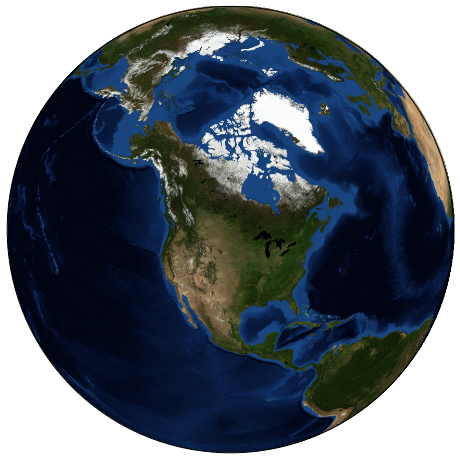

In [ ]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

El significado de los argumentos de ``Basemap`` se discutirá momentáneamente.
Lo útil es que el globo que se muestra aquí no es una mera imagen; ¡Es un eje de Matplotlib completamente funcional que comprende coordenadas esféricas y que nos permite sobretrazar fácilmente datos en el mapa!
Por ejemplo, podemos usar una proyección de mapa diferente, acercarnos a América del Norte y trazar la ubicación de Seattle.
Usaremos una imagen etopo (que muestra características topográficas tanto en tierra como bajo el océano) como fondo del mapa:

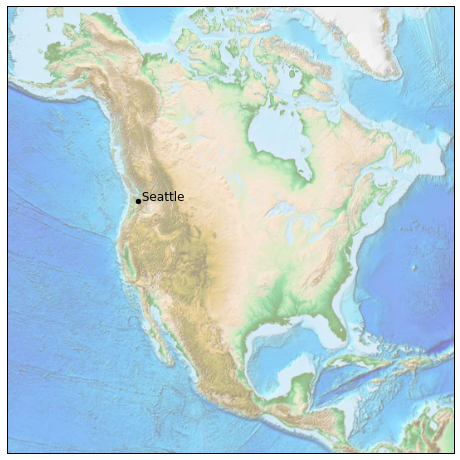

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

Esto le da una breve idea del tipo de visualizaciones geográficas que son posibles con solo unas pocas líneas de Python.
Ahora analizaremos las funciones de Basemap con más profundidad y brindaremos varios ejemplos de visualización de datos de mapas.
Usando estos breves ejemplos como bloques de construcción, debería poder crear casi cualquier visualización de mapa que desee.

## Proyecciones de mapas
Lo primero que debe decidir al usar mapas es qué proyección usar.
Probablemente esté familiarizado con el hecho de que es imposible proyectar un mapa esférico, como el de la Tierra, sobre una superficie plana sin distorsionarlo de alguna manera o romper su continuidad.
Estas proyecciones se han desarrollado a lo largo de la historia humana, ¡y hay muchas opciones!
Dependiendo del uso previsto de la proyección del mapa, hay ciertas características del mapa (p. ej., dirección, área, distancia, forma u otras consideraciones) que es útil mantener.
El paquete Basemap implementa varias docenas de tales proyecciones, todas referenciadas por un código de formato corto.
Aquí demostraremos brevemente algunos de los más comunes.
Comenzaremos definiendo una rutina de conveniencia para dibujar nuestro mapa mundial junto con las líneas de longitud y latitud:

In [ ]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

### Proyecciones cilíndricas
Las proyecciones cartográficas más simples son las proyecciones cilíndricas, en las que las líneas de latitud y longitud constantes se asignan a líneas horizontales y verticales, respectivamente.
Este tipo de mapeo representa bastante bien las regiones ecuatoriales, pero produce distorsiones extremas cerca de los polos.
El espaciado de las líneas de latitud varía entre diferentes proyecciones cilíndricas, lo que lleva a diferentes propiedades de conservación y diferentes distorsiones cerca de los polos.
En la siguiente figura mostramos un ejemplo de la *proyección cilíndrica equidistante*, que elige una escala de latitud que preserva las distancias a lo largo de los meridianos.
Otras proyecciones cilíndricas son las proyecciones Mercator (``projection='merc'``) y las proyecciones cilíndricas de áreas iguales (``projection='cea'``).

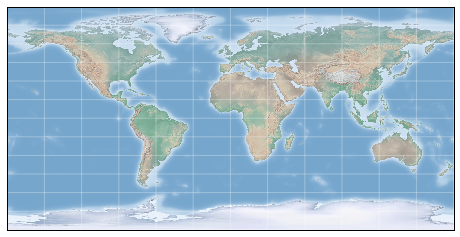

In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

Los argumentos adicionales de Basemap para esta vista especifican la latitud (``lat``) y la longitud (``lon``) de la esquina inferior izquierda (``llcrnr``) y la esquina superior derecha (``urcrnr` `) para el mapa deseado, en unidades de grados.

### Proyecciones pseudocilíndricas
Las proyecciones pseudocilíndricas relajan el requisito de que los meridianos (líneas de longitud constante) permanezcan verticales; esto puede dar mejores propiedades cerca de los polos de la proyección.
La proyección de Mollweide (``projection='moll'``) es un ejemplo común de esto, en el que todos los meridianos son arcos elípticos.
Está construido para preservar el área a lo largo del mapa: aunque hay distorsiones cerca de los polos, el área de pequeños parches refleja el área real.
Otras proyecciones pseudocilíndricas son las proyecciones sinusoidal (``projection='sinu'``) y Robinson (``projection='robin'``).

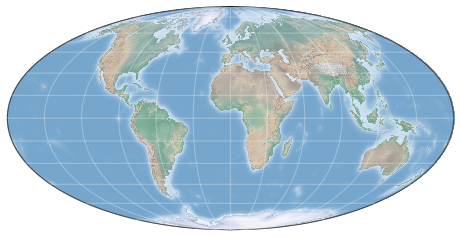

In [ ]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
            lat_0=0, lon_0=0)
draw_map(m)

Los argumentos extra para Basemap aquí se refieren a la latitud central (``lat_0``) y la longitud (``lon_0``) para el mapa deseado.

### Proyecciones en perspectiva
Las proyecciones en perspectiva se construyen usando una elección particular de punto de perspectiva, similar a si fotografiaras la Tierra desde un punto particular en el espacio (¡un punto que, para algunas proyecciones, técnicamente se encuentra dentro de la Tierra!).
Un ejemplo común es la proyección ortográfica (``projection='ortho'``), que muestra un lado del globo visto desde una distancia muy larga. Como tal, solo puede mostrar la mitad del globo a la vez.
Otras proyecciones basadas en perspectiva incluyen la proyección gnomónica (``projection='gnom'``) y la proyección estereográfica (``projection='stere'``).
Suelen ser los más útiles para mostrar pequeñas porciones del mapa.
Aquí hay un ejemplo de la proyección ortográfica:

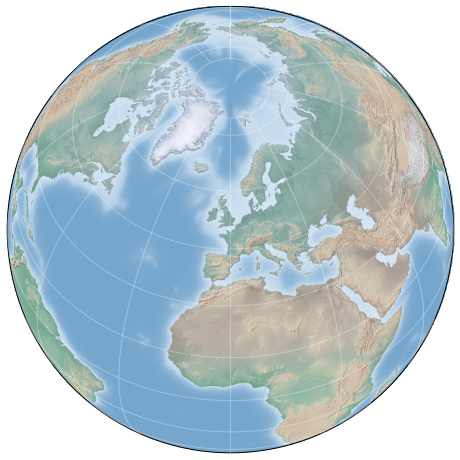

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
            lat_0=50, lon_0=0)
draw_map(m);

### Proyecciones cónicas
Una proyección cónica proyecta el mapa en un solo cono, que luego se desenrolla.
Esto puede generar muy buenas propiedades locales, pero las regiones alejadas del punto de enfoque del cono pueden distorsionarse mucho.
Un ejemplo de esto es la proyección cónica conforme de Lambert (``projection='lcc''``), que vimos anteriormente en el mapa de América del Norte.
Proyecta el mapa en un cono dispuesto de tal manera que dos paralelos estándar (especificados en Basemap por ``lat_1`` y ``lat_2``) tienen distancias bien representadas, con una escala que disminuye entre ellos y aumenta fuera de ellos.
Otras proyecciones cónicas útiles son la proyección cónica equidistante (``projection='eqdc'``) y la proyección de áreas equivalentes de Albers (``projection='aea'``).
Las proyecciones cónicas, como las proyecciones en perspectiva, tienden a ser buenas opciones para representar partes pequeñas o medianas del globo.

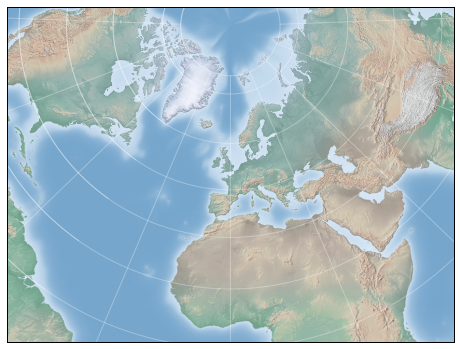

In [ ]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            lon_0=0, lat_0=50, lat_1=45, lat_2=55,
            width=1.6E7, height=1.2E7)
draw_map(m)

### Otras proyecciones
Si va a hacer mucho con las visualizaciones basadas en mapas, le animo a leer sobre otras proyecciones disponibles, junto con sus propiedades, ventajas y desventajas.
Lo más probable es que estén disponibles en [Basemap package](http://matplotlib.org/basemap/users/mapsetup.html).
Si profundiza lo suficiente en este tema, encontrará una subcultura increíble de geeks geo-viz que estarán listos para argumentar fervientemente en apoyo de su proyección favorita para cualquier aplicación determinada.

## Dibujar un fondo de mapa
Anteriormente vimos los métodos ``bluemarble()`` y ``shadedrelief()`` para proyectar imágenes globales en el mapa, así como los métodos ``drawparallels()`` y ``drawmeridians()`` para dibujar líneas de latitud y longitud constantes.
El paquete de mapa base contiene una variedad de funciones útiles para dibujar bordes de características físicas como continentes, océanos, lagos y ríos, así como límites políticos como países y estados y condados de EE. UU.
Las siguientes son algunas de las funciones de dibujo disponibles que quizás desee explorar utilizando las funciones de ayuda de IPython:
- **Límites físicos y masas de agua**
    - ``drawcoastlines()``: Dibujar líneas de costa continental
    - ``drawlsmask()``: Dibuja una máscara entre la tierra y el mar, para usar con la proyección de imágenes en uno u otro
    - ``drawmapboundary()``: Dibuja el límite del mapa, incluido el color de relleno de los océanos.
    - ``drawrivers()``: Dibujar ríos en el mapa
    - ``fillcontinents()``: Rellena los continentes con un color dado; opcionalmente llenar lagos con otro color
- **Límites políticos**
    - ``drawcountries()``: Dibuja los límites de los países
    - ``drawstates()``: Dibuja los límites de los estados de EE.UU.
    - ``drawcounties()``: Dibuja los límites de los condados de EE.UU.
- **Características del mapa**
    - ``drawgreatcircle()``: Dibuja un gran círculo entre dos puntos
    - ``drawparallels()``: Dibujar líneas de latitud constante
    - ``drawmeridians()``: Dibujar líneas de longitud constante
    - ``drawmapscale()``: Dibujar una escala lineal en el mapa
- **Imágenes de todo el mundo**
    - ``bluemarble()``: Proyecte la imagen de la canica azul de la NASA en el mapa
    - ``shadedrelief()``: Proyecte una imagen en relieve sombreada en el mapa
    - ``etopo()``: dibuja una imagen en relieve de etopo en el mapa
    - ``warpimage()``: Proyecte una imagen proporcionada por el usuario en el mapa
Para las entidades basadas en límites, debe establecer la resolución deseada al crear una imagen de mapa base.
El argumento ``resolución`` de la clase ``Basemap`` establece el nivel de detalle en los límites, ya sea ``'c'`` (crudo), ``'l'`` (bajo), ``'i '`` (intermedio), ``'h'`` (alto), ``'f'`` (completo), o ``Ninguno`` si no se van a utilizar límites.


Esta elección es importante: establecer límites de alta resolución en un mapa global, por ejemplo, puede ser *muy* lento.
Este es un ejemplo de cómo dibujar límites terrestres/marítimos y el efecto del parámetro de resolución.
Crearemos un mapa de baja y alta resolución de la hermosa isla de Skye en Escocia.
Se encuentra a 57,3°N, 6,2°O, y un mapa de 90.000 × 120.000 kilómetros lo muestra bien:

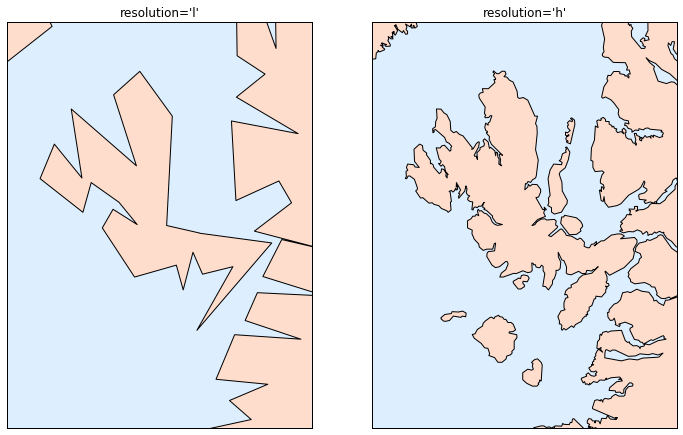

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
                width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));

Tenga en cuenta que las costas de baja resolución no son adecuadas para este nivel de zoom, mientras que la alta resolución funciona bien.
Sin embargo, el nivel bajo funcionaría bien para una vista global y sería *mucho* más rápido que cargar los datos de borde de alta resolución para todo el mundo.
Es posible que se requiera algo de experimentación para encontrar el parámetro de resolución correcto para una vista determinada: la mejor ruta es comenzar con un gráfico rápido de baja resolución y aumentar la resolución según sea necesario.

## Trazado de datos en mapas
Quizás la pieza más útil del kit de herramientas de mapa base es la capacidad de superponer una variedad de datos en un fondo de mapa.
Para gráficos y texto simples, cualquier función ``plt`` funciona en el mapa; puede usar la instancia ``Basemap`` para proyectar las coordenadas de latitud y longitud en las coordenadas ``(x, y)`` para trazar con ``plt``, como vimos anteriormente en el ejemplo de Seattle.
Además de esto, hay muchas funciones específicas del mapa disponibles como métodos de la instancia ``Basemap``.
Estos funcionan de manera muy similar a sus contrapartes estándar de Matplotlib, pero tienen un argumento booleano adicional ``latlon``, que si se establece en ``True`` le permite pasar latitudes y longitudes sin procesar al método, en lugar de proyectar ``(x , y)`` coordenadas.
Algunos de estos métodos específicos del mapa son:
- ``contour()``/``contourf()`` : Dibujar líneas de contorno o contornos rellenos
- ``imshow()``: Dibujar una imagen
- ``pcolor()``/``pcolormesh()`` : Dibujar un diagrama de pseudocolor para mallas irregulares/regulares
- ``plot()``: Dibujar líneas y/o marcadores.
- ``scatter()``: Dibujar puntos con marcadores.
- ``quiver()``: Dibujar vectores.
- ``barbs()``: Dibujar púas de viento.
- ``drawgreatcircle()``: Dibuja un gran círculo.
Veremos algunos ejemplos de algunos de estos a medida que continuamos.
Para obtener más información sobre estas funciones, incluidas varias gráficas de ejemplo, consulte [online Basemap documentation](http://matplotlib.org/basemap/).

## Ejemplo: Ciudades de California
Recuerde que en [Personalización de las leyendas de los gráficos](04.06-Personalización-de-leyendas-de-gráficos.ipynb) demostramos el uso del tamaño y el color en un gráfico de dispersión para transmitir información sobre la ubicación, el tamaño y la población de las ciudades de California.
Aquí, crearemos este gráfico nuevamente, pero usando Basemap para poner los datos en contexto.
Empezamos con la carga de los datos, como hicimos antes:

In [ ]:
import pandas as pd
cities = pd.read_csv('data/california_cities.csv')

# Extract the data we're interested in
lat = cities['latd'].values
lon = cities['longd'].values
population = cities['population_total'].values
area = cities['area_total_km2'].values

A continuación, configuramos la proyección del mapa, dispersamos los datos y luego creamos una barra de colores y una leyenda:

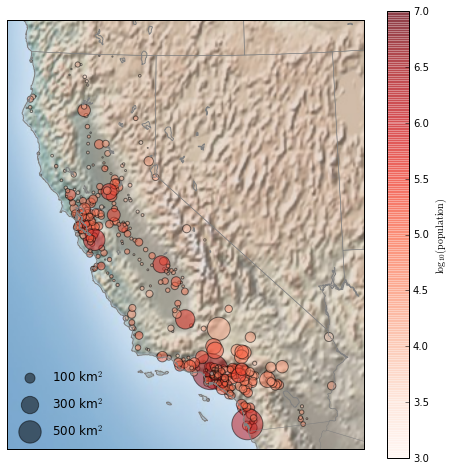

In [ ]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=37.5, lon_0=-119,
            width=1E6, height=1.2E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=area,
          cmap='Reds', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.5, s=a,
                label=str(a) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False,
           labelspacing=1, loc='lower left');

Esto nos muestra aproximadamente dónde se han asentado poblaciones más grandes de personas en California: se agrupan cerca de la costa en las áreas de Los Ángeles y San Francisco, se extienden a lo largo de las carreteras en el valle central plano y evitan casi por completo las regiones montañosas a lo largo de las fronteras de el estado.

## Ejemplo: datos de temperatura superficial
Como ejemplo de visualización de algunos datos geográficos más continuos, consideremos el "vórtice polar" que golpeó la mitad este de los Estados Unidos en enero de 2014.
Una gran fuente para cualquier tipo de datos climáticos es [NASA's Goddard Institute for Space Studies](http://data.giss.nasa.gov/).
Aquí usaremos los datos de temperatura de GIS 250, que podemos descargar usando comandos de shell (es posible que estos comandos deban modificarse en máquinas con Windows).
Los datos utilizados aquí se descargaron el 12/06/2016 y el tamaño del archivo es de aproximadamente 9 MB:

In [ ]:
# !curl -O http://data.giss.nasa.gov/pub/gistemp/gistemp250.nc.gz
# !gunzip gistemp250.nc.gz

Los datos vienen en formato NetCDF, que puede leerse en Python con la biblioteca ``netCDF4``.
Puede instalar esta biblioteca como se muestra aquí
```
$ conda install netcdf4
```
Leemos los datos de la siguiente manera:

In [ ]:
from netCDF4 import Dataset
data = Dataset('gistemp250.nc')

El archivo contiene muchas lecturas de temperatura global en una variedad de fechas; necesitamos seleccionar el índice de la fecha que nos interesa, en este caso, 15 de enero de 2014:

In [ ]:
from netCDF4 import date2index
from datetime import datetime
timeindex = date2index(datetime(2014, 1, 15),
                       data.variables['time'])

Ahora podemos cargar los datos de latitud y longitud, así como la anomalía de temperatura para este índice:

In [ ]:
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]
lon, lat = np.meshgrid(lon, lat)
temp_anomaly = data.variables['tempanomaly'][timeindex]

Finalmente, usaremos el método ``pcolormesh()`` para dibujar una malla de color de los datos.
Veremos América del Norte y usaremos un mapa en relieve sombreado en el fondo.
Tenga en cuenta que para estos datos elegimos específicamente un mapa de colores divergente, que tiene un color neutro en cero y dos colores contrastantes en valores negativos y positivos.
También dibujaremos ligeramente las costas sobre los colores como referencia:

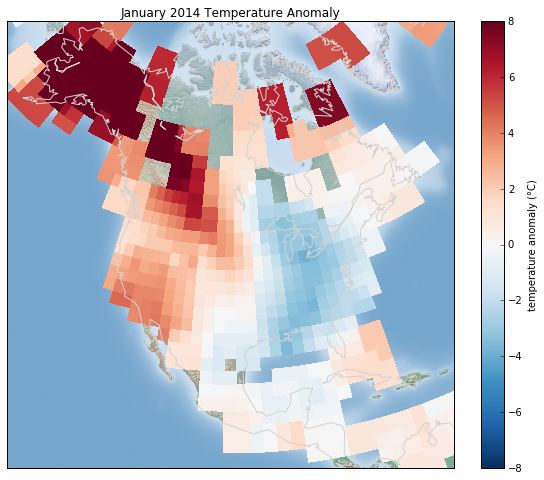

In [ ]:
fig = plt.figure(figsize=(10, 8))
m = Basemap(projection='lcc', resolution='c',
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.shadedrelief(scale=0.5)
m.pcolormesh(lon, lat, temp_anomaly,
             latlon=True, cmap='RdBu_r')
plt.clim(-8, 8)
m.drawcoastlines(color='lightgray')

plt.title('January 2014 Temperature Anomaly')
plt.colorbar(label='temperature anomaly (°C)');

Los datos pintan una imagen de las anomalías de temperatura extremas y localizadas que ocurrieron durante ese mes.
La mitad oriental de los Estados Unidos estuvo mucho más fría de lo normal, mientras que la mitad occidental y Alaska estuvieron mucho más cálidas.
Las regiones sin temperatura registrada muestran el fondo del mapa.